## Introduction


[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.


## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator` and set it to `GPU`.

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Mount Google Drive

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Install YOLO11 via Ultralytics

In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/107.7 GB disk)


## Inference with model pre-trained on COCO dataset

### CLI

**NOTE:** CLI requires no customization or Python code. You can simply run all tasks from the terminal with the yolo command.

In [ ]:
!yolo task=segment mode=predict model=yolo11s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 19.7M/19.7M [00:00<00:00, 132MB/s] 
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,097,776 parameters, 0 gradients, 35.5 GFLOPs

100% 104k/104k [00:00<00:00, 81.9MB/s]
WARNING ⚠️ NMS time limit 2.050s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 2 dogs, 1 backpack, 1 handbag, 92.5ms
Speed: 13.5ms preprocess, 92.5ms inference, 2480.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Result annotated image got saved in `{HOME}/runs/detect/predict/`. Let's display it.

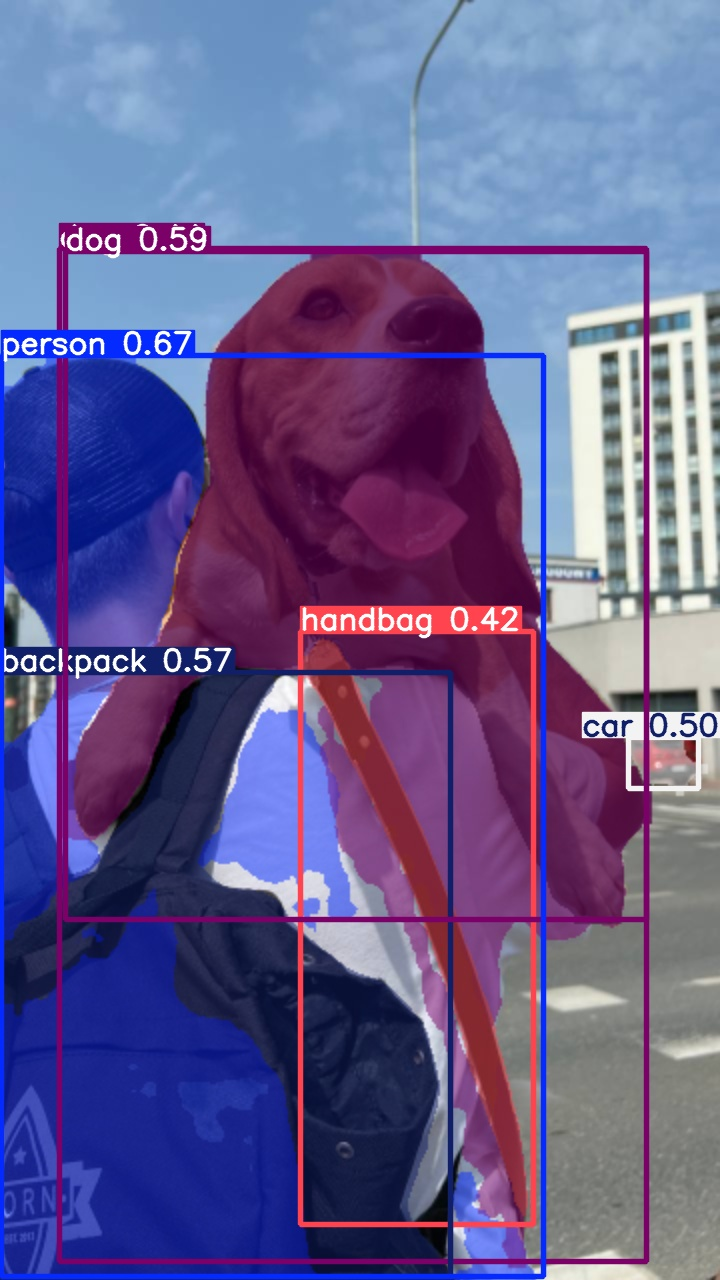

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/segment/predict/dog.jpg', width=600)

### SDK

**NOTE:** YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11s-seg.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 1 person, 1 car, 2 dogs, 1 backpack, 1 handbag, 145.2ms
Speed: 3.9ms preprocess, 145.2ms inference, 1258.0ms postprocess per image at shape (1, 3, 640, 384)


**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

In [ ]:
result.boxes.xyxy

tensor([[1.0439e+00, 3.5501e+02, 5.4354e+02, 1.2766e+03],
        [6.5886e+01, 2.5114e+02, 6.4685e+02, 9.1942e+02],
        [0.0000e+00, 6.7253e+02, 4.5094e+02, 1.2792e+03],
        [6.2817e+02, 7.3703e+02, 6.9893e+02, 7.8808e+02],
        [5.9720e+01, 2.4842e+02, 6.4695e+02, 1.2618e+03],
        [3.0094e+02, 6.3192e+02, 5.3370e+02, 1.2246e+03]], device='cuda:0')

In [ ]:
result.boxes.conf

tensor([0.6720, 0.5878, 0.5677, 0.4958, 0.4421, 0.4165], device='cuda:0')

In [ ]:
result.boxes.cls

tensor([ 0., 16., 24.,  2., 16., 26.], device='cuda:0')

In [ ]:
result.masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

**NOTE:** YOLO8 can be easily integrated with `supervision` using the familiar `from_ultralytics` connector.

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

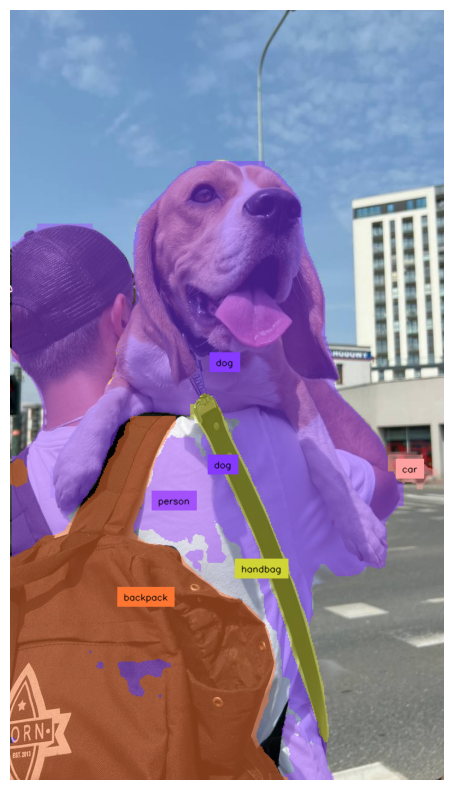

In [ ]:
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

## Fine-tune YOLO11 on River Plastic Waste Dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/ks-fsm9o/pelvis-ap-x-ray) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov8` export format.

In [6]:
from google.colab import userdata

In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("project-zero").project("aerial_river_plastic_wastes")
version = project.version(10)
dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Aerial_River_Plastic_Wastes-10 in yolov11:: 100%|██████████| 4938/4938 [00:01<00:00, 3796.13it/s]


## Custom Training

Check this link to tweak hyperparameters: https://docs.ultralytics.com/modes/train/#train-settings

In [ ]:
%cd {HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/

!yolo task=segment mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml epochs=15 plots=True batch=32 device=0 save=True imgsz=640

/content/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11
100% 19.7M/19.7M [00:00<00:00, 173MB/s]
New https://pypi.org/project/ultralytics/8.3.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=/content/datasets/Aerial_River_Plastic_Wastes-10/data.yaml, epochs=15, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buff

**NOTE:** The results of the completed training are saved in `{HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/runs/segment/train/`. Let's examine them.

In [ ]:
!ls {HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/runs/segment/train/

args.yaml					    labels.jpg	      train_batch2.jpg
BoxF1_curve.png					    MaskF1_curve.png  train_batch360.jpg
BoxP_curve.png					    MaskP_curve.png   train_batch361.jpg
BoxPR_curve.png					    MaskPR_curve.png  train_batch362.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv       val_batch0_pred.jpg
confusion_matrix.png				    results.png       val_batch1_labels.jpg
events.out.tfevents.1734498275.222463266bc7.2323.0  train_batch0.jpg  val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg  weights


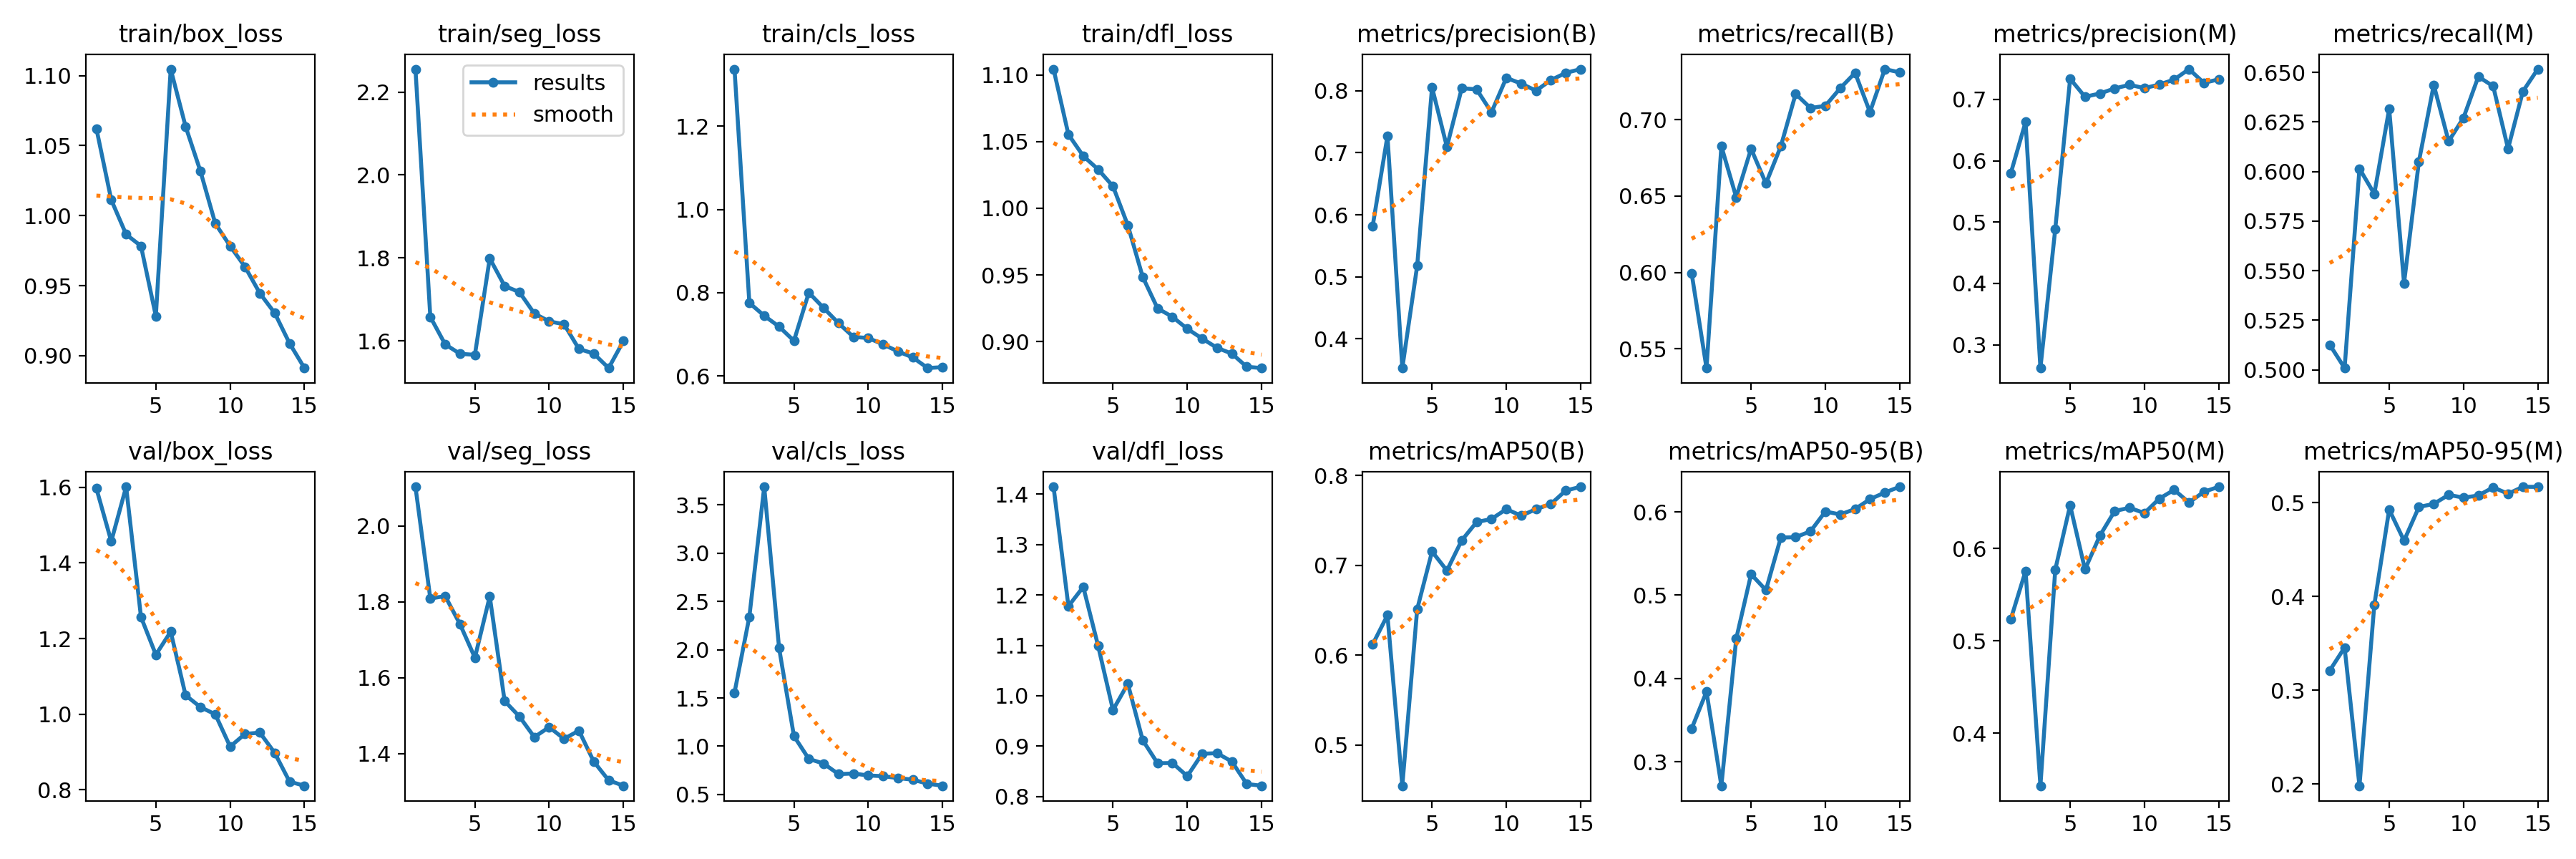

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/runs/segment/train/results.png')

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
%cd {HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/
!yolo task=segment mode=val model={HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

## Inference with custom model

In [ ]:
!yolo task=segment mode=predict model={HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs

image 1/95 /content/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_108_jpg.rf.0cd592574b46ddf6aa2e71c6b5240fc1.jpg: 640x640 10 plastics, 1 river, 20.3ms
image 2/95 /content/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_120_jpg.rf.e14b0782d7d1057f187c3885b9101ed2.jpg: 640x640 10 plastics, 1 river, 20.3ms
image 3/95 /content/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_122_jpg.rf.a3450937e6d66ebea12a3d53b9c70b1b.jpg: 640x640 8 plastics, 1 river, 20.3ms
image 4/95 /content/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_153_jpg.rf.d6f4c6202d61c3e837f0b2c990e62e08.jpg: 640x640 17 plastics, 1 river, 20.2ms
image 5/95 /content/datasets/Aerial_River_Plastic_Wastes-10/test/images/Aerial_Location_1_17_jpg.rf.5a17f2f214b4f1e10684166b4

**Let's take a look at few results.**

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/runs/segment/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

### Export Model in ONNX

In [9]:
%cd {HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/
!yolo export model={HOME}/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/runs/segment/train/weights/best.pt format=onnx dynamic=True imgsz=640 optimize=True device=None

/content/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 38, 8400), (1, 32, 160, 160)) (19.6 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 223.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 214.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 210.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 176.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 224.3 MB/s eta 0:00:00

requirements: AutoUpdate succ

### Loding

In [17]:
from ultralytics import YOLO
import cv2

In [11]:
# Load the ONNX model
model_path = "/content/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/runs/segment/train/weights/best.onnx"

In [12]:
# Perform inference
image_path = "/content/Aerial_Location_2_10.JPG"

In [18]:
# Load the exported ONNX model
onnx_model = YOLO(model_path)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Run inference
results = onnx_model(image_path)

Loading /content/drive/MyDrive/Aerial_River_Plastic_Wastes/yolo11/runs/segment/train/weights/best.onnx for ONNX Runtime inference...
Preferring ONNX Runtime AzureExecutionProvider

image 1/1 /content/Aerial_Location_2_10.JPG: 384x640 2 plastics, 1 river, 392.5ms
Speed: 3.6ms preprocess, 392.5ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)


In [19]:
import supervision as sv

detections = sv.Detections.from_ultralytics(results[0])

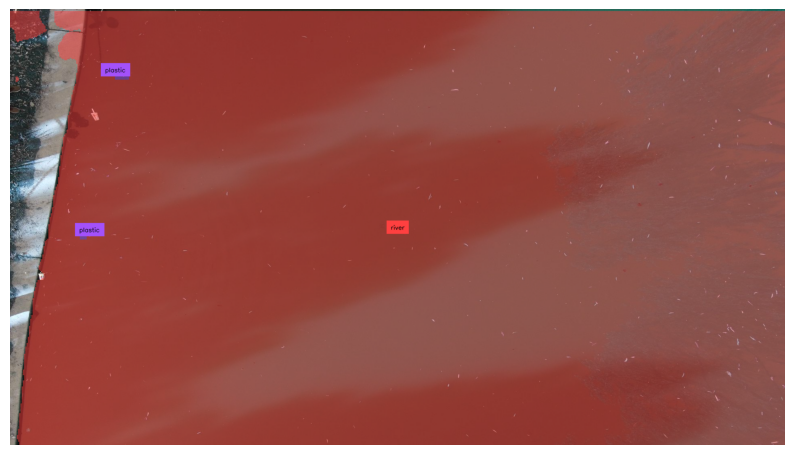

In [20]:
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))